In [25]:
import yfinance as yf
import pandas as pd

ticker = yf.Ticker("KO")

# ✅ Fetch full data + corporate actions
data = ticker.history(start="2015-01-01", end="2023-12-31", actions=True)
data.reset_index(inplace=True)

# Check columns
print(data.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


In [26]:
print(data.isnull().sum())  # check for missing values

data.fillna(method='ffill', inplace=True)  # fill forward
data.fillna(0, inplace=True)               # replace remaining nulls with 0


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [27]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()
data.dropna(inplace=True)


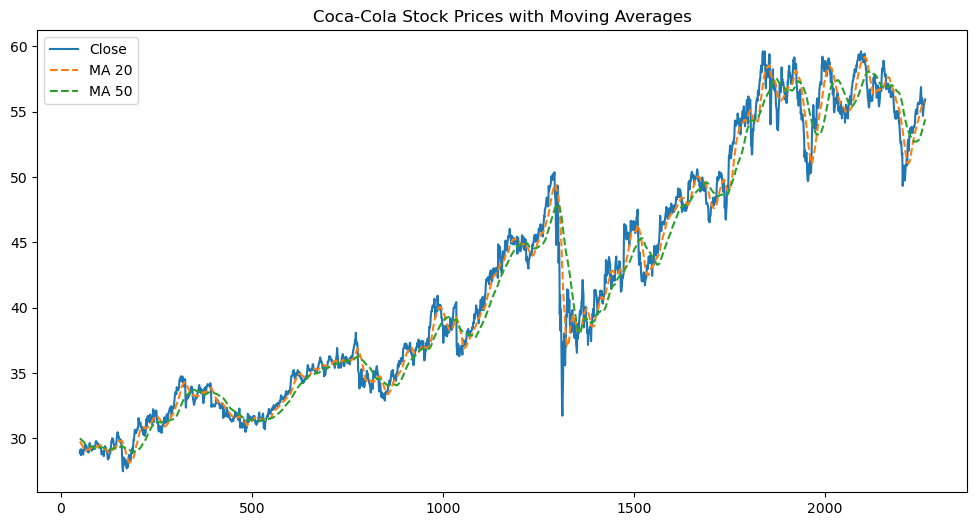

In [28]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['MA_20'], '--', label='MA 20')
plt.plot(data.index, data['MA_50'], '--', label='MA 50')
plt.legend()
plt.title('Coca-Cola Stock Prices with Moving Averages')
plt.show()


In [32]:
from sklearn.model_selection import train_test_split

features = ['Open','High','Low','Volume',
            'MA_20','MA_50','Daily_Return','Volatility']
target = 'Close'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42)


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MSE:", mse, "MAE:", mae)


MSE: 2.563437086658357 MAE: 1.150417752147528


In [34]:
import yfinance as yf
import pandas as pd

ticker = "KO"  # keep it as a string

# Fetch live 1-minute data for today
live_data = yf.download(ticker, period='1d', interval='1m')

# Feature Engineering (same as before)
live_data['MA_20'] = live_data['Close'].rolling(20).mean()
live_data['MA_50'] = live_data['Close'].rolling(50).mean()
live_data['Daily_Return'] = live_data['Close'].pct_change()
live_data['Volatility'] = live_data['Daily_Return'].rolling(20).std()
live_data.fillna(0, inplace=True)

# Predict using the last available row
latest = live_data[features].iloc[-1:]
pred = model.predict(latest)
print(f"Predicted Closing Price: ${pred[0]:.2f}")


/tmp/ipykernel_378/1125363188.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  live_data = yf.download(ticker, period='1d', interval='1m')
[*********************100%***********************]  1 of 1 completed
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted Closing Price: $55.73
